<a href="https://colab.research.google.com/github/lukitasmois/2162-clasificacion-validacion-de-modelos-y-metricas/blob/main/Clasificacion_validacion_y_metricas_desafios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='dark'>**Clasificación: Validación de modelos y métricas de evaluación**</h1>
## 💪 Practica 💪

## 01.11 - Desafio diabetes

Vamos a practicar el contenido que se presentó en la clase a partir de algunas actividades, pero utilizando un conjunto de datos diferente con datos de pacientes a ser diagnosticados con diabetes o no. Los desafíos siguen una secuencia de tareas, sirviendo como un proyecto secundario. Para realizar los desafíos, descarga la base de datos desde este [enlace](https://raw.githubusercontent.com/lukitasmois/2162-clasificacion-validacion-de-modelos-y-metricas/refs/heads/main/diabetes.csv).

### 01.11.01. Preparativo de los datos

Para la construcción de un modelo de machine learning se necesitan datos. Como tarea inicial, realiza la lectura de la base de datos de diabetes y divide los datos en variables explicativas y variable objetivo (x e y). La variable objetivo es la columna que quieres clasificar, que contiene la información de si el paciente tiene o no diabetes. Las variables explicativas son todas las columnas excepto la de diabetes. La separación de los datos se puede hacer con la selección de columnas con `pandas`.

#### Importo los datos

In [1]:
import pandas as pd

In [2]:
datos = pd.read_csv('https://raw.githubusercontent.com/lukitasmois/2162-clasificacion-validacion-de-modelos-y-metricas/refs/heads/main/diabetes.csv')
datos.head()

,glicemia,presion_sanguinea,grasa_subcutanea_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1


#### Divido los datos en las variables explicativas y de respuesta

In [3]:
X = datos.drop(columns='diabetes')
y = datos.diabetes

### 01.11.02. Division de los datos de entrenamiento, validacion y prueba

Una etapa muy importante en proyectos de clasificación es la validación de los modelos, para identificar si hay una generalización del modelo para datos nuevos. Realiza la división de los datos entre entrenamiento, validación y prueba. Utiliza el 5% de los datos para prueba y con el resto, deja el 25% para validación. En el momento de la separación, usa el parámetro `stratify` a partir de la variable objetivo para mantener la proporción de los datos.

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size= 0.05, stratify=y)
X_train, X_val, y_train, y_val =  train_test_split(X, y, test_size= 0.25, stratify=y)

### 01.11.03. Creacion del modelo

La etapa de modelado de datos consiste en utilizar un algoritmo capaz de identificar patrones en los datos y clasificar los valores. A partir del modelo es posible extraer una tasa de acierto para entender su desempeño. Crea 2 modelos utilizando los algoritmos `DecisionTreeClassifier` y `RandomForestClassifier` y evalúa la precisión de entrenamiento y prueba, eligiendo el valor 3 para el parámetro `max_depth` del algoritmo `DecisionTreeClassifier` y el valor 2 para el `max_depth` del algoritmo `RandomForestClassifier`, para que los modelos no se especialicen demasiado en el patrón de los datos de entrenamiento.

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [8]:
modelo_arbol = DecisionTreeClassifier(max_depth=3, random_state=101)
modelo_forest = RandomForestClassifier(max_depth=2, random_state=101)

In [13]:
lista_modelos = [('modelo en arbol',modelo_arbol), ('modelo forest',modelo_forest)]

In [15]:
for i in lista_modelos:
  i[1].fit(X_train, y_train)

In [17]:
for i in lista_modelos:
  print(f'Resultado de evaluacion del {i[0]}: {i[1].score(X_val, y_val)}')

Resultado de evaluacion del modelo en arbol: 0.6666666666666666
Resultado de evaluacion del modelo forest: 0.6868686868686869


### 01.11.04. Entender el comportamiento

La tasa de acierto generalmente no proporciona información suficiente para entender el comportamiento del modelo. La matriz de confusión es una herramienta más completa, capaz de proporcionar los aciertos y errores del modelo para cada clase. Construye una matriz de confusión para cada uno de los modelos para evaluar el desempeño de la predicción. Para construir la matriz, usa el método `predict` para generar las predicciones de los valores y comparar con los valores reales de la base de datos.

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [20]:
y_predict_arbol = modelo_arbol.predict(X_val)
y_predict_bosque = modelo_forest.predict(X_val)

In [25]:
matriz_arbol = confusion_matrix(y_val, y_predict_arbol)
matriz_bosque = confusion_matrix(y_val, y_predict_bosque)

lista_matrices = [matriz_arbol, matriz_bosque]

In [27]:
for matriz in lista_matrices:
  print('---------')
  print(matriz)

---------
[[58  8]
 [25  8]]
---------
[[61  5]
 [26  7]]


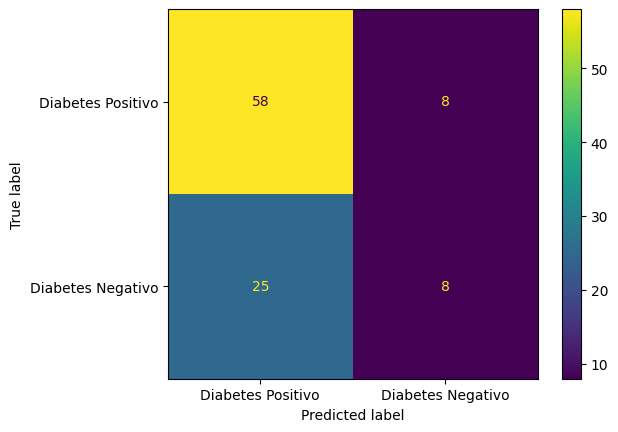

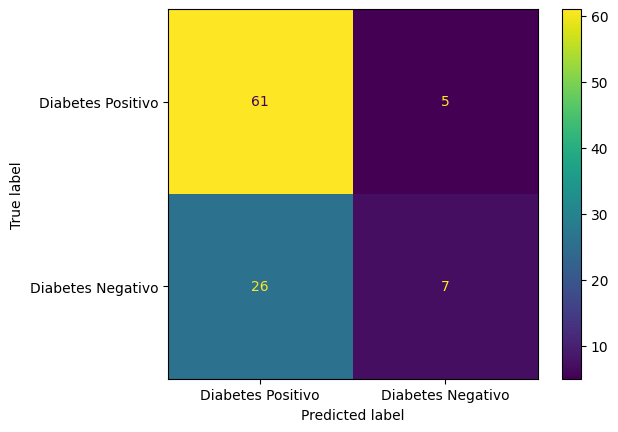

In [31]:
for matriz in lista_matrices:
  visualizer = ConfusionMatrixDisplay(matriz, display_labels=['Diabetes Positivo', 'Diabetes Negativo'])
  visualizer.plot();